### Model Selection:

#### 1. Load the dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### 2. Load the data

In [3]:
df = pd.read_csv('Amazon_Review_sentiment.csv')

In [4]:
df.head(1).T

,0
ProductId,B000YSTIL0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,5
Time,1272067200
Summary,Best Snack Ever!!
Text,I love these chips! This is the best snack eve...
Time_converted,2010-04-24
lemmas,I love these chip ! this be the good snack eve...
cleaned_lemmas,I love these chip this be the good snack ever...


In [5]:
reviews = df['Text']

#### Feature extraction using Tfidf vectorizer

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
y = df['Sentiment']
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(reviews)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Convert sentiment to binary labels
y = df['Sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize and train the model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict class labels and probabilities
y_pred_log_reg = log_reg.predict(X_test)
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Evaluate model
print("Logistic Regression - Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("Logistic Regression - ROC AUC Score: ", roc_auc_score(y_test, y_pred_prob_log_reg))

Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.26      0.40       213
           1       0.83      0.99      0.90       787

    accuracy                           0.83      1000
   macro avg       0.84      0.62      0.65      1000
weighted avg       0.83      0.83      0.79      1000

Logistic Regression - ROC AUC Score:  0.862280843042158


In [10]:
from sklearn.model_selection import cross_val_score
log_reg_scores = cross_val_score(log_reg, X_tfidf, y, cv=5, scoring='roc_auc')

print("Logistic Regression - Cross-Validation Scores: ", log_reg_scores)
print("Logistic Regression - Mean Cross-Validation Score: ", log_reg_scores.mean())

Logistic Regression - Cross-Validation Scores:  [0.91304907 0.92304679 0.84076146 0.85274476 0.82097902]
Logistic Regression - Mean Cross-Validation Score:  0.8701162202322728


In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict class labels and probabilities
y_pred_rf = rf.predict(X_test)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate model
print("Random Forest - Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest - ROC AUC Score: ", roc_auc_score(y_test, y_pred_prob_rf))

Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.08      0.14       213
           1       0.80      1.00      0.89       787

    accuracy                           0.80      1000
   macro avg       0.87      0.54      0.51      1000
weighted avg       0.83      0.80      0.73      1000

Random Forest - ROC AUC Score:  0.8325190448067482


In [12]:
rf_scores = cross_val_score(rf, X_tfidf, y, cv=5, scoring='roc_auc')

print("Random Forest - Cross-Validation Scores: ", rf_scores)
print("Random Forest - Mean Cross-Validation Score: ", rf_scores.mean())

Random Forest - Cross-Validation Scores:  [0.84716936 0.87580903 0.79556417 0.81131702 0.78551282]
Random Forest - Mean Cross-Validation Score:  0.8230744782903765


In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# Predict class labels and probabilities
y_pred_gb = gb.predict(X_test)
y_pred_prob_gb = gb.predict_proba(X_test)[:, 1]

# Evaluate model
print("Gradient Boosting - Classification Report:\n", classification_report(y_test, y_pred_gb))
print("Gradient Boosting - ROC AUC Score: ", roc_auc_score(y_test, y_pred_prob_gb))

Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.20      0.31       213
           1       0.82      0.98      0.89       787

    accuracy                           0.82      1000
   macro avg       0.79      0.59      0.60      1000
weighted avg       0.81      0.82      0.77      1000

Gradient Boosting - ROC AUC Score:  0.8025544201251559


In [14]:
gb_scores = cross_val_score(gb, X_tfidf, y, cv=5, scoring='roc_auc')

print("Gradient Boosting - Cross-Validation Scores: ", gb_scores)
print("Gradient Boosting - Mean Cross-Validation Score: ", gb_scores.mean())

Gradient Boosting - Cross-Validation Scores:  [0.85935079 0.87143575 0.77978122 0.77148601 0.776081  ]
Gradient Boosting - Mean Cross-Validation Score:  0.8116269563127079


#### Feature extraction using count vectorizer

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews)

In [17]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize and train the model
log_reg_2 = LogisticRegression(max_iter=1000)
log_reg_2.fit(X_train_2, y_train_2)

# Predict class labels and probabilities
y_pred_log_reg_2 = log_reg_2.predict(X_test_2)
y_pred_prob_log_reg_2 = log_reg_2.predict_proba(X_test_2)[:, 1]

# Evaluate model
print("Logistic Regression - Classification Report:\n", classification_report(y_test_2, y_pred_log_reg_2))
print("Logistic Regression - ROC AUC Score: ", roc_auc_score(y_test_2, y_pred_prob_log_reg_2))

Logistic Regression - Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.56      0.61       213
           1       0.89      0.92      0.90       787

    accuracy                           0.84      1000
   macro avg       0.77      0.74      0.75      1000
weighted avg       0.84      0.84      0.84      1000

Logistic Regression - ROC AUC Score:  0.8364980224421497


In [19]:
log_reg_scores_2 = cross_val_score(log_reg_2, X, y, cv=5, scoring='roc_auc')

print("Logistic Regression - Cross-Validation Scores: ", log_reg_scores_2)
print("Logistic Regression - Mean Cross-Validation Score: ", log_reg_scores_2.mean())

Logistic Regression - Cross-Validation Scores:  [0.88955735 0.90930139 0.79850794 0.81816434 0.79993007]
Logistic Regression - Mean Cross-Validation Score:  0.843092217609389


In [20]:
# Initialize and train the model
rf2 = RandomForestClassifier()
rf2.fit(X_train_2, y_train_2)

# Predict class labels and probabilities
y_pred_rf2 = rf2.predict(X_test_2)
y_pred_prob_rf2 = rf2.predict_proba(X_test_2)[:, 1]

# Evaluate model
print("Random Forest - Classification Report:\n", classification_report(y_test_2, y_pred_rf2))
print("Random Forest - ROC AUC Score: ", roc_auc_score(y_test_2, y_pred_prob_rf2))

Random Forest - Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.08      0.15       213
           1       0.80      1.00      0.89       787

    accuracy                           0.80      1000
   macro avg       0.87      0.54      0.52      1000
weighted avg       0.83      0.80      0.73      1000

Random Forest - ROC AUC Score:  0.8085378002875364


In [21]:
rf_scores2 = cross_val_score(rf2, X, y, cv=5, scoring='roc_auc')

print("Random Forest - Cross-Validation Scores: ", rf_scores2)
print("Random Forest - Mean Cross-Validation Score: ", rf_scores2.mean())

Random Forest - Cross-Validation Scores:  [0.8578716  0.86872    0.7773958  0.77214452 0.76674242]
Random Forest - Mean Cross-Validation Score:  0.8085748682149415


In [22]:
# Initialize and train the model
gb2 = GradientBoostingClassifier()
gb2.fit(X_train_2, y_train_2)

# Predict class labels and probabilities
y_pred_gb2 = gb2.predict(X_test_2)
y_pred_prob_gb2 = gb2.predict_proba(X_test_2)[:, 1]

# Evaluate model
print("Gradient Boosting - Classification Report:\n", classification_report(y_test_2, y_pred_gb2))
print("Gradient Boosting - ROC AUC Score: ", roc_auc_score(y_test_2, y_pred_prob_gb2))

Gradient Boosting - Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.25      0.38       213
           1       0.83      0.98      0.90       787

    accuracy                           0.82      1000
   macro avg       0.78      0.61      0.64      1000
weighted avg       0.81      0.82      0.79      1000

Gradient Boosting - ROC AUC Score:  0.8295452511766915


In [23]:
gb_scores2 = cross_val_score(gb2, X, y, cv=5, scoring='roc_auc')

print("Gradient Boosting - Cross-Validation Scores: ", gb_scores2)
print("Gradient Boosting - Mean Cross-Validation Score: ", gb_scores.mean())

Gradient Boosting - Cross-Validation Scores:  [0.87706313 0.88004783 0.78391478 0.76515152 0.7682634 ]
Gradient Boosting - Mean Cross-Validation Score:  0.8116269563127079


#### Summarize results

In [25]:
from sklearn.metrics import recall_score
# Function to train model and calculate recall
def calculate_recall(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred)
    return recall
# Calculate recall for each model with Count Vectorizer
recall_log_reg_count = calculate_recall(log_reg_2, X_train_2, X_test_2, y_train_2, y_test_2)
recall_rf_count = calculate_recall(rf2, X_train_2, X_test_2, y_train_2, y_test_2)
recall_gb_count = calculate_recall(gb2, X_train_2, X_test_2, y_train_2, y_test_2)

# Calculate recall for each model with TF-IDF
recall_log_reg_tfidf = calculate_recall(log_reg, X_train, X_test, y_train, y_test)
recall_rf_tfidf = calculate_recall(rf, X_train, X_test, y_train, y_test)
recall_gb_tfidf = calculate_recall(gb, X_train, X_test, y_train, y_test)

# Summarize results in a table
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Count Vectorizer Recall': [recall_log_reg_count, recall_rf_count, recall_gb_count],
    'TF-IDF Recall': [recall_log_reg_tfidf, recall_rf_tfidf, recall_gb_tfidf]
}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Count Vectorizer Recall  TF-IDF Recall
0  Logistic Regression                 0.919949       0.987294
1        Random Forest                 0.998729       0.998729
2    Gradient Boosting                 0.977128       0.984752


#### Top products

In [27]:
# Train Random Forest model on the entire dataset
rf_final = RandomForestClassifier()
rf_final.fit(X_tfidf, y)

# Predict sentiment probabilities and labels for the entire dataset
y_pred_rf_final = rf_final.predict(X_tfidf)
y_pred_prob_rf_final = rf_final.predict_proba(X_tfidf)[:, 1]

# Add predictions to the dataframe
df['predicted_sentiment'] = y_pred_rf_final
df['predicted_prob'] = y_pred_prob_rf_final

In [28]:
df.head()

,ProductId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Time_converted,lemmas,cleaned_lemmas,tokens,tokens_simple,review_length,Sentiment,predicted_sentiment,predicted_prob
0,B000YSTIL0,0,0,5,1272067200,Best Snack Ever!!,I love these chips! This is the best snack eve...,2010-04-24,I love these chip ! this be the good snack eve...,I love these chip this be the good snack ever...,"['love', 'chip', 'good', 'snack', 'healthy', '...","['i', 'love', 'these', 'chips', 'this', 'is', ...",20,positive,1,0.96
1,B000KDZDJ0,0,0,5,1316563200,Bohemian tree frog,"This is a really good chocolate candy, has jus...",2011-09-21,"this be a really good chocolate candy , have j...",this be a really good chocolate candy have ju...,"['good', 'chocolate', 'candy', 'right', 'mixtu...","['this', 'is', 'a', 'really', 'good', 'chocola...",37,positive,1,1.00
2,B001GVIUXQ,6,6,5,1235692800,Great Food,My wife has a male cat who throws up EVERYTHIN...,2009-02-27,my wife have a male cat who throw up everythin...,my wife have a male cat who throw up everythin...,"['wife', 'male', 'cat', 'throw', 'food', 'cat'...","['my', 'wife', 'has', 'a', 'male', 'cat', 'who...",31,positive,1,0.97
3,B002FXIMDM,5,5,5,1292976000,Super Tasty!,This entire product line is absolutely great! ...,2010-12-22,this entire product line be absolutely great !...,this entire product line be absolutely great ...,"['entire', 'product', 'line', 'absolutely', 'g...","['this', 'entire', 'product', 'line', 'is', 'a...",22,positive,1,0.91
4,B000FFLHU2,1,2,5,1335312000,Excellent product.,I use this to keep my blood level stable all d...,2012-04-25,I use this to keep my blood level stable all d...,I use this to keep my blood level stable all d...,"['use', 'blood', 'level', 'stable', 'day', 'wo...","['i', 'use', 'this', 'to', 'keep', 'my', 'bloo...",30,positive,1,0.94


In [29]:
# Check if lengths match
if len(y_pred_rf) == len(df):
    df['predicted_sentiment'] = y_pred_rf
else:
    print("Mismatch in lengths, cannot add predictions.")

Mismatch in lengths, cannot add predictions.


In [30]:
print("Size of X_tfidf:", X_tfidf.shape)
print("Number of rows in DataFrame:", len(df))

Size of X_tfidf: (5000, 15282)
Number of rows in DataFrame: 5000


In [31]:
# Extract positive reviews
positive_reviews = df[df['predicted_sentiment'] == 1]

# Optional: Extract top N positive reviews by probability
top_positive_reviews = positive_reviews.sort_values(by='predicted_prob', ascending=False).head(20)

In [32]:
# Group by ProductId and count positive reviews
positive_reviews_by_product = positive_reviews.groupby('ProductId').size().reset_index(name='positive_review_count')

# Sort by count of positive reviews
positive_reviews_by_product = positive_reviews_by_product.sort_values(by='positive_review_count', ascending=False)

print(positive_reviews_by_product.head(10))  

       ProductId  positive_review_count
1177  B0013A0QXC                     10
3015  B007PA30ZU                      8
2060  B002QWP89S                      8
1011  B000UBD88A                      7
2059  B002QWHJOU                      7
2240  B003D4F1QS                      7
2020  B002LANN56                      7
3004  B007M832YY                      7
2219  B003B3OOPA                      6
3042  B007Y59HVM                      6


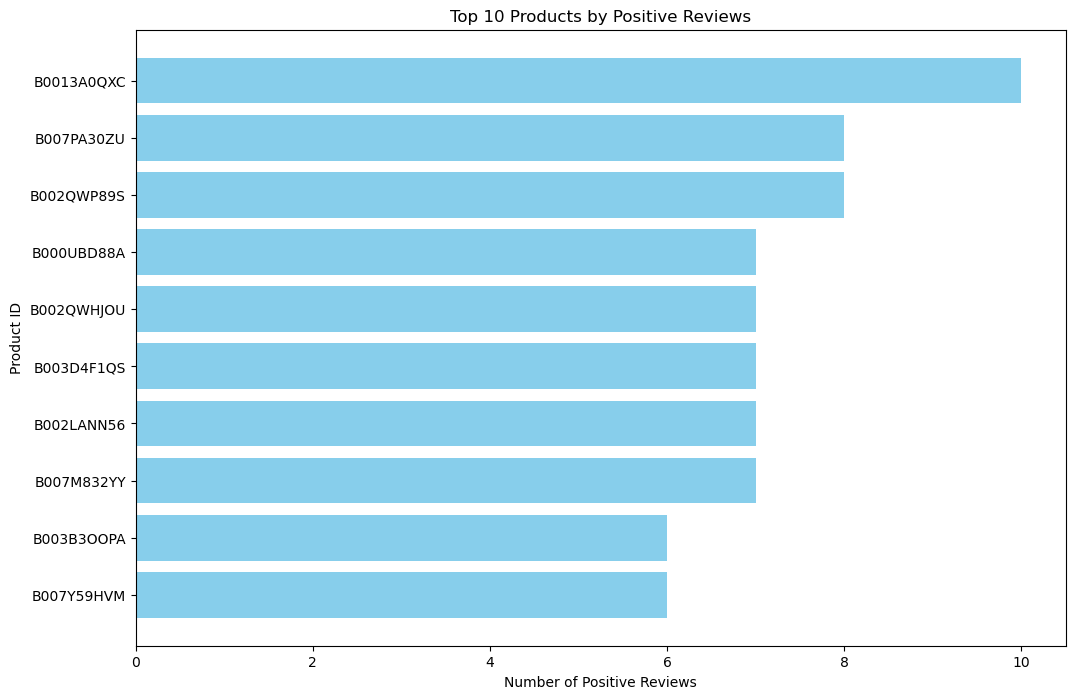

In [33]:
plt.figure(figsize=(12, 8))
top_products = positive_reviews_by_product.head(10)
plt.barh(top_products['ProductId'], top_products['positive_review_count'], color='skyblue')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Product ID')
plt.title('Top 10 Products by Positive Reviews')
plt.gca().invert_yaxis()
plt.show()

C:\Users\3sthe\AppData\Local\Temp\ipykernel_30896\3190085121.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='predicted_sentiment', data=df, palette='coolwarm')


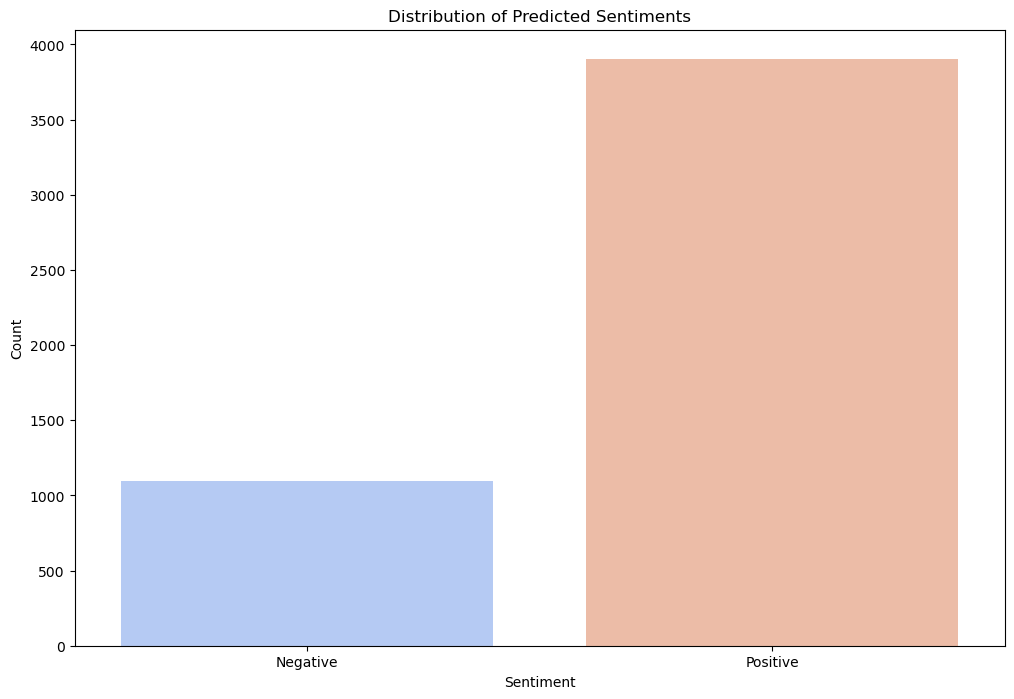

In [34]:
plt.figure(figsize=(12, 8))
sns.countplot(x='predicted_sentiment', data=df, palette='coolwarm')
plt.title('Distribution of Predicted Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.show()

In [35]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Vectorize text data
count_vectorizer = CountVectorizer(stop_words='english')
X_counts = count_vectorizer.fit_transform(df['cleaned_lemmas'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X_counts)

# Get topics
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

print_top_words(lda, count_vectorizer.get_feature_names_out(), 10)

Topic #0: tea taste flavor like good chocolate drink try br bar
Topic #1: love good dog buy amazon great treat order product like
Topic #2: coffee use br cup make like good product taste just
Topic #3: br food cat eat like product make just use ingredient
Topic #4: taste good like just try use oil water make flavor


In [36]:
import pandas as pd

# Sample categorization based on aspects
df['aspect'] = df['cleaned_lemmas'].apply(lambda x: 'taste' if 'taste' in x else ('packaging' if 'packaging' in x else 'value'))

# View categorized reviews
print(df[['Text', 'aspect']].head(10))

                                                Text aspect
0  I love these chips! This is the best snack eve...  value
1  This is a really good chocolate candy, has jus...  value
2  My wife has a male cat who throws up EVERYTHIN...  value
3  This entire product line is absolutely great! ...  value
4  I use this to keep my blood level stable all d...  taste
5  I like the way it tastes. My neighbor used to ...  taste
6  I discovered these in  Florida and was unable ...  value
7  I LOVE these cookies!  As a Type 1 diabetic an...  taste
8  I never imagined that 5 lbs of ginger would be...  value
9  I use this instead of Maple Syrup.  It is so g...  value


In [37]:
print(df['aspect'].value_counts())

aspect
value        3411
taste        1514
packaging      75
Name: count, dtype: int64


In [38]:
# Example: Categorize based on keywords
df['category'] = df['cleaned_lemmas'].apply(lambda x: 'service issue' if 'refund' in x else ('quality issue' if 'broken' in x else 'general'))

# View categorized reviews
print(df[['Text', 'category']].head(10))

                                                Text category
0  I love these chips! This is the best snack eve...  general
1  This is a really good chocolate candy, has jus...  general
2  My wife has a male cat who throws up EVERYTHIN...  general
3  This entire product line is absolutely great! ...  general
4  I use this to keep my blood level stable all d...  general
5  I like the way it tastes. My neighbor used to ...  general
6  I discovered these in  Florida and was unable ...  general
7  I LOVE these cookies!  As a Type 1 diabetic an...  general
8  I never imagined that 5 lbs of ginger would be...  general
9  I use this instead of Maple Syrup.  It is so g...  general


In [39]:
print(df['category'].value_counts())

category
general          4970
quality issue      16
service issue      14
Name: count, dtype: int64


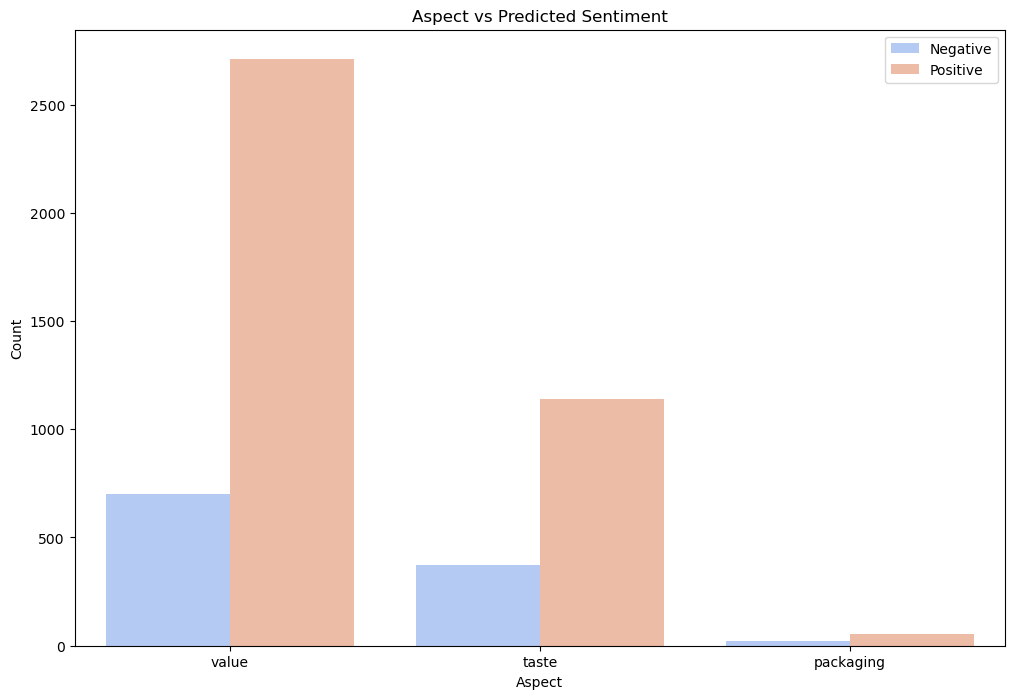

In [40]:
# Create a count plot
plt.figure(figsize=(12, 8))
sns.countplot(x='aspect', hue='predicted_sentiment', data=df, palette='coolwarm')
plt.title('Aspect vs Predicted Sentiment')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.legend(['Negative', 'Positive'])


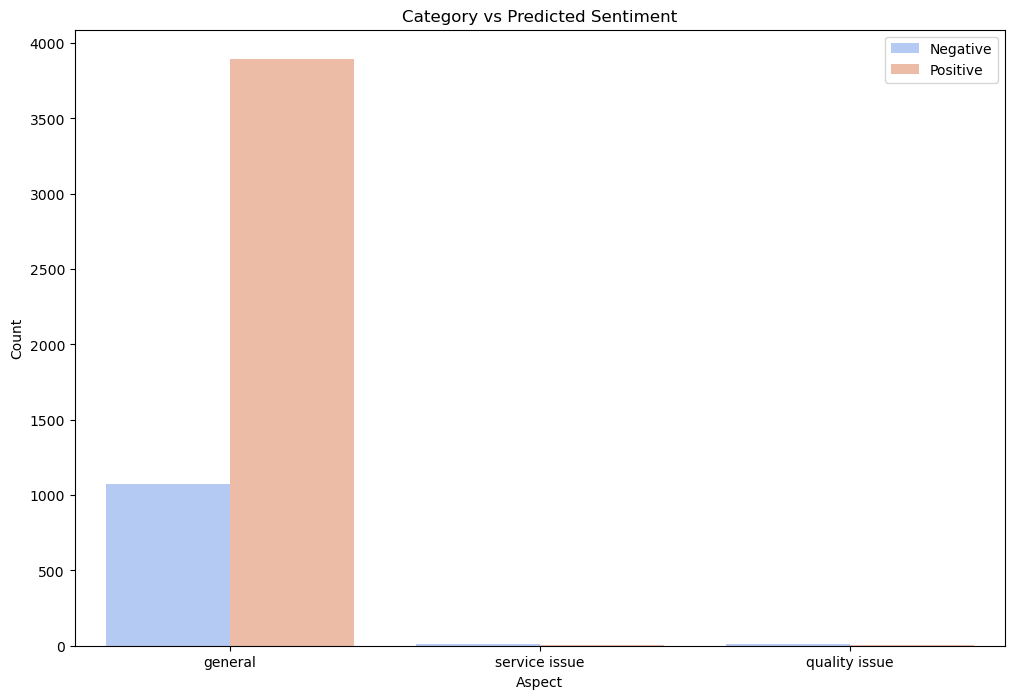

In [41]:
# Create a count plot
plt.figure(figsize=(12, 8))
sns.countplot(x='category', hue='predicted_sentiment', data=df, palette='coolwarm')
plt.title('Category vs Predicted Sentiment')
plt.xlabel('Aspect')
plt.ylabel('Count')
plt.legend(['Negative', 'Positive'])


Text(95.72222222222221, 0.5, 'Aspect')

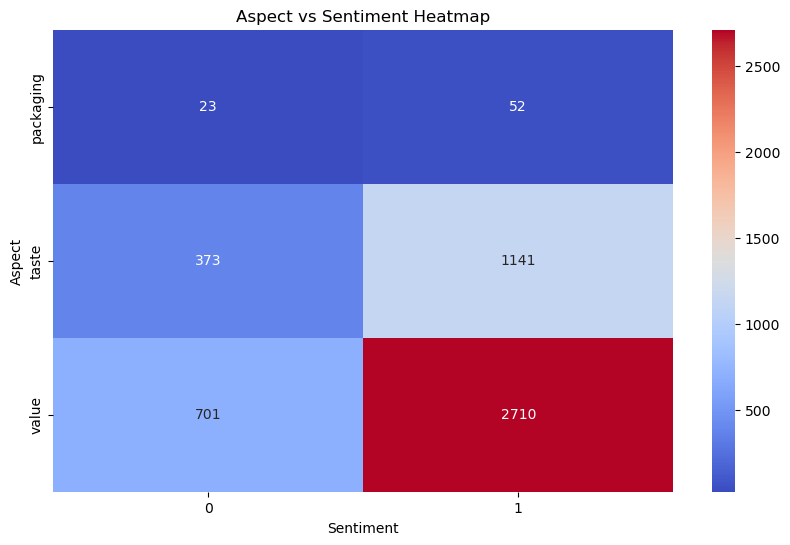

In [42]:
# Create a pivot table for the heatmap
aspect_sentiment_pivot = df.pivot_table(index='aspect', columns='predicted_sentiment', aggfunc='size', fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(aspect_sentiment_pivot, annot=True, fmt='d', cmap='coolwarm')
plt.title('Aspect vs Sentiment Heatmap')
plt.xlabel('Sentiment')
plt.ylabel('Aspect')


In [43]:
# Filter and list Product IDs with their aspect and sentiment
aspect_sentiment_product = df[['ProductId', 'aspect', 'predicted_sentiment']]

# Display the first few rows
print(aspect_sentiment_product.head(20))

     ProductId aspect  predicted_sentiment
0   B000YSTIL0  value                    1
1   B000KDZDJ0  value                    1
2   B001GVIUXQ  value                    1
3   B002FXIMDM  value                    1
4   B000FFLHU2  taste                    1
5   B0006L0UVM  taste                    1
6   B000LRIGNK  value                    1
7   B0014JUPTW  taste                    1
8   B0041CD3W0  value                    1
9   B00311T4R0  value                    1
10  B000H227BG  value                    1
11  B002LMPDNY  taste                    1
12  B00014HI50  value                    1
13  B000S97K9M  value                    1
14  B000HDL1J4  value                    1
15  B003CB0VAI  value                    1
16  B002IQO03M  value                    1
17  B001EO77FW  value                    1
18  B000OQ2DL4  value                    1
19  B000E148MG  value                    1


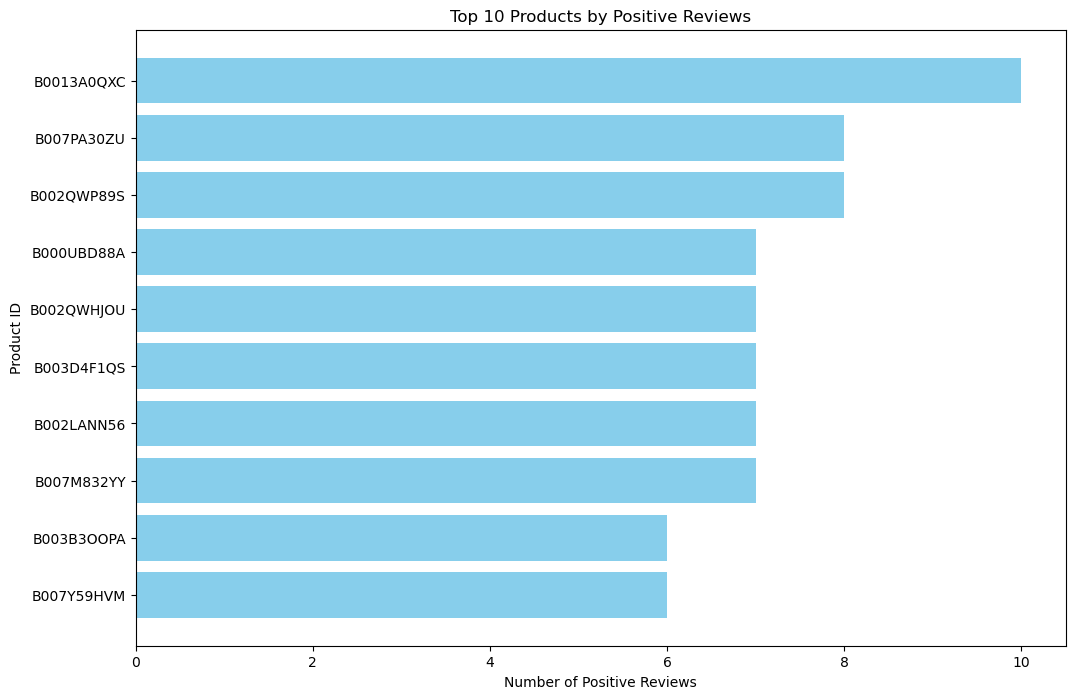

In [44]:
# Group by ProductId and count positive reviews
positive_reviews_by_product = df[df['predicted_sentiment'] == 1].groupby('ProductId').size().reset_index(name='positive_review_count')
positive_reviews_by_product = positive_reviews_by_product.sort_values(by='positive_review_count', ascending=False).head(10)

# Plot the top 10 products by positive reviews
plt.figure(figsize=(12, 8))
plt.barh(positive_reviews_by_product['ProductId'], positive_reviews_by_product['positive_review_count'], color='skyblue')
plt.xlabel('Number of Positive Reviews')
plt.ylabel('Product ID')
plt.title('Top 10 Products by Positive Reviews')
plt.gca().invert_yaxis()
plt.show()

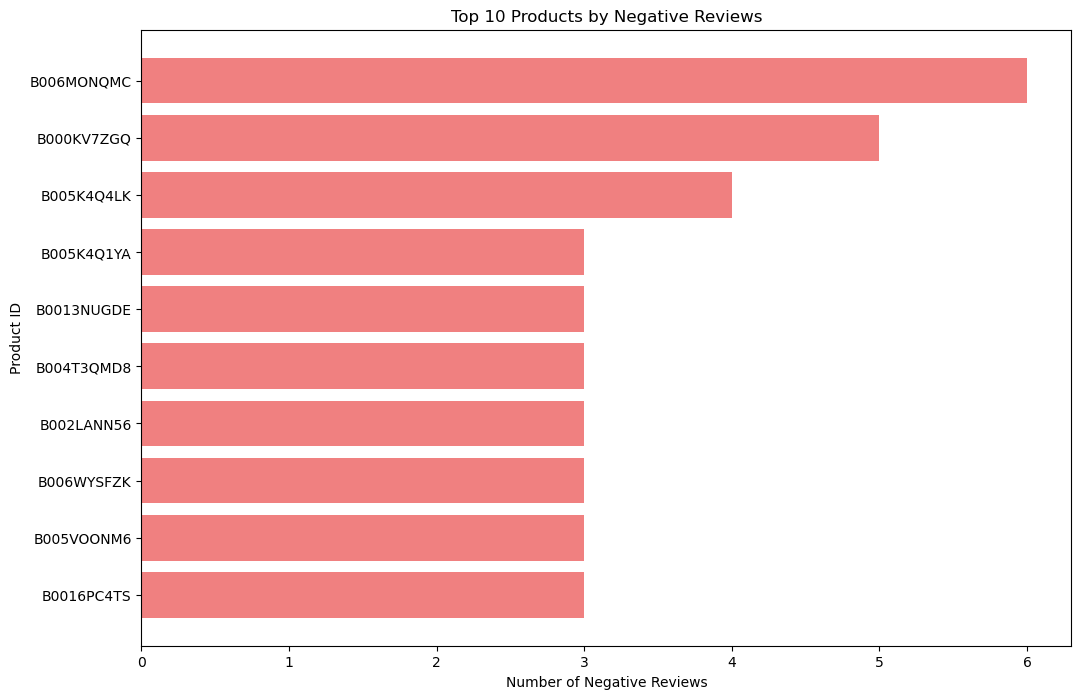

In [45]:
# Group by ProductId and count negative reviews
negative_reviews_by_product = df[df['predicted_sentiment'] == 0].groupby('ProductId').size().reset_index(name='negative_review_count')
negative_reviews_by_product = negative_reviews_by_product.sort_values(by='negative_review_count', ascending=False).head(10)

# Plot the top 10 products by negative reviews
plt.figure(figsize=(12, 8))
plt.barh(negative_reviews_by_product['ProductId'], negative_reviews_by_product['negative_review_count'], color='lightcoral')
plt.xlabel('Number of Negative Reviews')
plt.ylabel('Product ID')
plt.title('Top 10 Products by Negative Reviews')
plt.gca().invert_yaxis()
plt.show()

In [46]:
df.columns

Index(['ProductId', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score',
       'Time', 'Summary', 'Text', 'Time_converted', 'lemmas', 'cleaned_lemmas',
       'tokens', 'tokens_simple', 'review_length', 'Sentiment',
       'predicted_sentiment', 'predicted_prob', 'aspect', 'category'],
      dtype='object')